Importing the dependencies

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [157]:
df = pd.read_csv('/content/Phishing_Legitimate_full.csv')

In [158]:
column_name = 'CLASS_LABEL'
row_counts = df[column_name].value_counts()

print(f"Number of rows for each class in '{column_name}':")
print(row_counts)

Number of rows for each class in 'CLASS_LABEL':
CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


Dataset Description

In [159]:
print(f"{df.dtypes}\n")
print(f"Dimension:{df.shape[0]} x {df.shape[1]}")
datatype_counts = df.dtypes.value_counts()
for dtype, count in datatype_counts.items():
  print(f"{dtype}: {count} columns")

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [160]:
df = df.drop("id",axis=1)

In [161]:
null = df.isnull().sum()
for i in range(len(df.columns)):
  print(f"{df.columns[i]}: {null[i]} ({(null[i]/len(df))*100}%)")
total_cells = np.prod(df.shape)
total_missing = null.sum()
print(f"\nTotal missing values: {total_missing} ({(total_missing/total_cells)*100}%)\n")

NumDots: 0 (0.0%)
SubdomainLevel: 0 (0.0%)
PathLevel: 0 (0.0%)
UrlLength: 0 (0.0%)
NumDash: 0 (0.0%)
NumDashInHostname: 0 (0.0%)
AtSymbol: 0 (0.0%)
TildeSymbol: 0 (0.0%)
NumUnderscore: 0 (0.0%)
NumPercent: 0 (0.0%)
NumQueryComponents: 0 (0.0%)
NumAmpersand: 0 (0.0%)
NumHash: 0 (0.0%)
NumNumericChars: 0 (0.0%)
NoHttps: 0 (0.0%)
RandomString: 0 (0.0%)
IpAddress: 0 (0.0%)
DomainInSubdomains: 0 (0.0%)
DomainInPaths: 0 (0.0%)
HttpsInHostname: 0 (0.0%)
HostnameLength: 0 (0.0%)
PathLength: 0 (0.0%)
QueryLength: 0 (0.0%)
DoubleSlashInPath: 0 (0.0%)
NumSensitiveWords: 0 (0.0%)
EmbeddedBrandName: 0 (0.0%)
PctExtHyperlinks: 0 (0.0%)
PctExtResourceUrls: 0 (0.0%)
ExtFavicon: 0 (0.0%)
InsecureForms: 0 (0.0%)
RelativeFormAction: 0 (0.0%)
ExtFormAction: 0 (0.0%)
AbnormalFormAction: 0 (0.0%)
PctNullSelfRedirectHyperlinks: 0 (0.0%)
FrequentDomainNameMismatch: 0 (0.0%)
FakeLinkInStatusBar: 0 (0.0%)
RightClickDisabled: 0 (0.0%)
PopUpWindow: 0 (0.0%)
SubmitInfoToEmail: 0 (0.0%)
IframeOrFrame: 0 (0.0%)
Miss

In [162]:
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [163]:
df.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Cleaning

In [164]:
df = df[df['NumDots'] < 20]
df = df[df['NumDash'] < 40]

## **1. 50 features set**

Train & Test Split

In [165]:
X = df.drop("CLASS_LABEL",axis=1)
Y = df['CLASS_LABEL']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

Model Creation & Evaluation

In [166]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MLP Classifier":MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42),
    "XGBoost Classifier":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine":SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1000
           1       0.93      0.95      0.94      1000

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



--- Decision Tree Classifier ---
Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1000
           1       0.96      0.97      0.97      1000

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



--- MLP Classifier ---
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1000
           1       0.96      0.96  

## **2. 25 features set**

Correlation

In [167]:
correlation_matrix = df.corr()
target_correlation = correlation_matrix['CLASS_LABEL']
target_correlation_without_self = target_correlation[target_correlation.index != 'CLASS_LABEL']
absolute_correlations = target_correlation_without_self.abs()

#Maximum absolute correlation
max_correlation_value = absolute_correlations.max()
max_correlated_feature = absolute_correlations.idxmax()
print(f"Maximum correlation value: {max_correlation_value}")
print(f"Feature with maximum correlation: {max_correlated_feature}")

#Minimum absolute correlation
min_correlation_value = absolute_correlations.min()
min_correlated_feature = absolute_correlations.idxmin()
print(f"Minimum correlation value: {min_correlation_value}")
print(f"Feature with minimum correlation: {min_correlated_feature}")

#Filter features with |correlation| > 0.1
target_correlation = correlation_matrix['CLASS_LABEL'].abs()

selected_features = target_correlation[target_correlation > 0.1].index.tolist()
selected_features.remove('CLASS_LABEL')

#New dataset with filtered features
filtered_df = df[selected_features + ['CLASS_LABEL']]
len(selected_features)

Maximum correlation value: 0.5404775593220177
Feature with maximum correlation: PctExtNullSelfRedirectHyperlinksRT
Minimum correlation value: 0.0012004667011330167
Feature with minimum correlation: ImagesOnlyInForm


24

Train & Test Split

In [168]:
X = filtered_df.drop(columns='CLASS_LABEL')
Y = filtered_df['CLASS_LABEL']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Model Creation and Evaluation

In [169]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MLP Classifier":MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42),
    "XGBoost Classifier":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine":SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1453
           1       0.93      0.93      0.93      1547

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



--- Decision Tree Classifier ---
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1453
           1       0.96      0.97      0.96      1547

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000



--- MLP Classifier ---
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1453
           1       0.95      0.94  

## **3.Correlation reduced with 90% pve**

In [189]:
X = filtered_df.drop(columns='CLASS_LABEL')
Y = filtered_df['CLASS_LABEL']

In [190]:
numerical_data = filtered_df.select_dtypes(include=['float64', 'int64'])
numerical_data = filtered_df.select_dtypes(include=['float64', 'int64'])

# Standardize the data (PCA requires standardized data for meaningful results)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numerical_data)

# Apply PCA
pca = PCA()
pca.fit(standardized_data)

# Calculate Proportion of Variance Explained (PVE) and Cumulative PVE
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine the number of components needed for 90% variance
num_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1

X_pca = PCA(n_components=num_components_90).fit_transform(standardized_data)

# Output results
print(f"Number of components to retain 90% variance: {num_components_90}")

Number of components to retain 90% variance: 17


Train & Test Split

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

Model Creation and Evaluation

In [192]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MLP Classifier":MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42),
    "XGBoost Classifier":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine":SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.99      0.99      0.99      1547

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



--- Decision Tree Classifier ---
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1453
           1       0.98      0.97      0.98      1547

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



--- MLP Classifier ---
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1453
           1       1.00      1.00  

## **4. 50 features set with 90% pve**

In [173]:
X = df.drop('CLASS_LABEL', axis=1)
Y = df['CLASS_LABEL']

In [174]:
pca = PCA()
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca.fit(X_standardized)

# Calculate cumulative PVE and determine the number of components for 85% variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"Number of components to retain 90% variance: {num_components_90}")

# Transform the data to the reduced PCA space
X_pca = PCA(n_components=num_components_90).fit_transform(X_standardized)

Number of components to retain 90% variance: 30


Train & Test Split

In [175]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

Model Creation and Evaluation

In [176]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MLP Classifier":MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42),
    "XGBoost Classifier":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine":SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1453
           1       0.94      0.93      0.94      1547

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



--- Decision Tree Classifier ---
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1453
           1       0.90      0.90      0.90      1547

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



--- MLP Classifier ---
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1453
           1       0.96      0.96  

## **5. 50 features set with 85% pve**

In [177]:
pca = PCA()
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca.fit(X_standardized)

# Calculate cumulative PVE and determine the number of components for 85% variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components_85 = np.argmax(cumulative_variance_ratio >= 0.85) + 1

print(f"Number of components to retain 90% variance: {num_components_85}")

# Transform the data to the reduced PCA space
X_pca = PCA(n_components=num_components_85).fit_transform(X_standardized)

Number of components to retain 90% variance: 26


Train & Test Split

In [178]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

Model Creation and Evaluation

In [179]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MLP Classifier":MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42),
    "XGBoost Classifier":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine":SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1453
           1       0.93      0.92      0.93      1547

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



--- Decision Tree Classifier ---
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1453
           1       0.91      0.90      0.90      1547

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



--- MLP Classifier ---
Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1453
           1       0.96      0.96  

## **6. 50 features set with 80% pve**

In [180]:
pca = PCA()
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca.fit(X_standardized)

# Calculate cumulative PVE and determine the number of components for 85% variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components_80 = np.argmax(cumulative_variance_ratio >= 0.80) + 1

print(f"Number of components to retain 90% variance: {num_components_80}")

# Transform the data to the reduced PCA space
X_pca = PCA(n_components=num_components_80).fit_transform(X_standardized)

Number of components to retain 90% variance: 23


Train & Test Split

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

Model Creation and Evaluation

In [182]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MLP Classifier":MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42),
    "XGBoost Classifier":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine":SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, random_state=42),
}


for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1453
           1       0.93      0.93      0.93      1547

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



--- Decision Tree Classifier ---
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1453
           1       0.91      0.91      0.91      1547

    accuracy                           0.91      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.91      0.90      3000



--- MLP Classifier ---
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1453
           1       0.96      0.95  

## **7. 50 features set with 75% pve**

In [183]:
pca = PCA()
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca.fit(X_standardized)

# Calculate cumulative PVE and determine the number of components for 85% variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components_75 = np.argmax(cumulative_variance_ratio >= 0.75) + 1

print(f"Number of components to retain 90% variance: {num_components_75}")

# Transform the data to the reduced PCA space
X_pca = PCA(n_components=num_components_75).fit_transform(X_standardized)

Number of components to retain 90% variance: 20


Train & Test Split

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

Model Creation and Evaluation

In [185]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MLP Classifier":MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42),
    "XGBoost Classifier":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine":SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1453
           1       0.93      0.92      0.92      1547

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



--- Decision Tree Classifier ---
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1453
           1       0.90      0.90      0.90      1547

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



--- MLP Classifier ---
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1453
           1       0.95      0.95  

### **8. 50 features set with 70% pve**

In [186]:
pca = PCA()
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
pca.fit(X_standardized)

# Calculate cumulative PVE and determine the number of components for 85% variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components_70 = np.argmax(cumulative_variance_ratio >= 0.70) + 1

print(f"Number of components to retain 90% variance: {num_components_70}")

# Transform the data to the reduced PCA space
X_pca = PCA(n_components=num_components_70).fit_transform(X_standardized)

Number of components to retain 90% variance: 18


Train & Test Split

In [187]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

Model Creation and Evaluation

In [188]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "MLP Classifier":MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42),
    "XGBoost Classifier":XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine":SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=100, random_state=42),
}

for name, model in models.items():
    print(f"--- {name} ---")

    model.fit(X_train, Y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    report = classification_report(Y_test, y_pred)
    print("Classification Report:")
    print(report)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1453
           1       0.92      0.91      0.91      1547

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



--- Decision Tree Classifier ---
Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1453
           1       0.90      0.91      0.91      1547

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



--- MLP Classifier ---
Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1453
           1       0.95      0.95  

**SVM Accuracy v/s No. of Components**

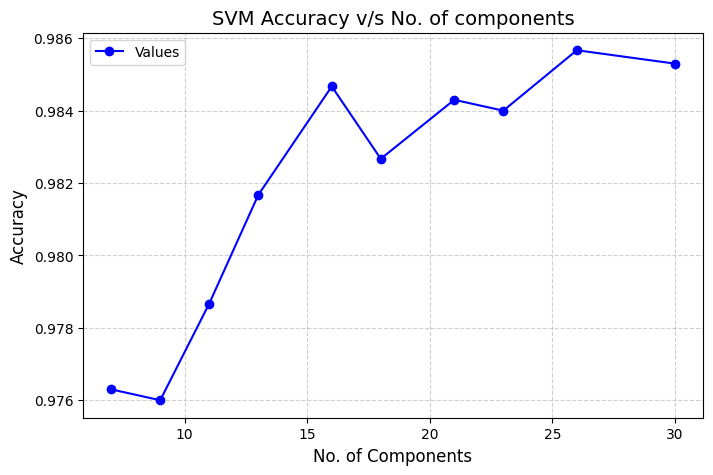

In [194]:
import matplotlib.pyplot as plt

# Data
x = [7, 9, 11, 13, 16,  18, 21, 23, 26, 30]
y = [0.9763, 0.976, 0.97867, 0.98167, 0.98467,  0.98267, 0.9843, 0.984, 0.98567, 0.9853]

# Plotting the graph
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Values')

# Adding labels and title
plt.title("SVM Accuracy v/s No. of components", fontsize=14)
plt.xlabel("No. of Components", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()